In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import pickle

In [5]:
eda=pd.read_csv("/content/drive/MyDrive/New Data/Prepared_Data/NEW_FINAL/sample_data/Final_Sample_data.csv")
X = eda.drop("Fraud",axis=1)
y = eda["Fraud"]
from imblearn.over_sampling import SMOTE,SMOTENC
cat_feat = ["Rndrng_Prvdr_Type","Rndrng_Prvdr_State_Abrvtn","Provider_Gender_Or_Organization"]
smnc = SMOTENC(categorical_features=cat_feat,random_state=7)
X_smt, y_smt = smnc.fit_resample(X, y)

In [6]:
eda.head(5)

,Rndrng_Prvdr_Type,Rndrng_Prvdr_State_Abrvtn,Provider_Gender_Or_Organization,Tot_HCPCS_Cds,Bene_Avg_Age,Tot_Srvcs,Tot_Benes,Bene_Avg_Risk_Scre,Tot_Sbmtd_Chrg,Tot_Mdcr_Pymt_Amt,Fraud
0,Obstetrics & Gynecology,NY,F,16,67,92.0,44,0.8716,12362.00,4747.27,0
1,Certified Registered Nurse Anesthetist (CRNA),WV,F,43,73,173.0,151,1.1677,445627.17,17561.22,0
2,Cardiology,OH,M,42,75,3666.0,1959,1.7947,325148.00,155174.46,0
3,Psychiatry,GA,M,5,51,269.0,86,1.2614,15004.64,10210.46,0
4,Emergency Medicine,NY,M,14,70,592.0,386,3.3561,661135.00,55719.72,0


In [7]:
X_smt.shape, y_smt.shape

((359680, 10), (359680,))

In [8]:
y_smt.value_counts()

,count
Fraud,
0,179840
1,179840


In [9]:
X_smt.head()

,Rndrng_Prvdr_Type,Rndrng_Prvdr_State_Abrvtn,Provider_Gender_Or_Organization,Tot_HCPCS_Cds,Bene_Avg_Age,Tot_Srvcs,Tot_Benes,Bene_Avg_Risk_Scre,Tot_Sbmtd_Chrg,Tot_Mdcr_Pymt_Amt
0,Obstetrics & Gynecology,NY,F,16,67,92.0,44,0.8716,12362.00,4747.27
1,Certified Registered Nurse Anesthetist (CRNA),WV,F,43,73,173.0,151,1.1677,445627.17,17561.22
2,Cardiology,OH,M,42,75,3666.0,1959,1.7947,325148.00,155174.46
3,Psychiatry,GA,M,5,51,269.0,86,1.2614,15004.64,10210.46
4,Emergency Medicine,NY,M,14,70,592.0,386,3.3561,661135.00,55719.72


In [10]:
X_res = pd.get_dummies(X_smt,dtype='int64',columns=["Rndrng_Prvdr_Type","Rndrng_Prvdr_State_Abrvtn","Provider_Gender_Or_Organization"], prefix="", prefix_sep="")
# dont' scale

In [11]:
X_res.head()

,Tot_HCPCS_Cds,Bene_Avg_Age,Tot_Srvcs,Tot_Benes,Bene_Avg_Risk_Scre,Tot_Sbmtd_Chrg,Tot_Mdcr_Pymt_Amt,Addiction Medicine,Adult Congenital Heart Disease,Advanced Heart Failure and Transplant Cardiology,...,VT,WA,WI,WV,WY,XX,ZZ,F,M,Organization
0,16,67,92.0,44,0.8716,12362.00,4747.27,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,43,73,173.0,151,1.1677,445627.17,17561.22,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,42,75,3666.0,1959,1.7947,325148.00,155174.46,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,5,51,269.0,86,1.2614,15004.64,10210.46,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,14,70,592.0,386,3.3561,661135.00,55719.72,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [12]:
X_res[['Tot_Srvcs' ,'Tot_Sbmtd_Chrg','Tot_Mdcr_Pymt_Amt']] = X_res[['Tot_Srvcs' ,'Tot_Sbmtd_Chrg','Tot_Mdcr_Pymt_Amt']].astype(int)

In [13]:
X_res['Bene_Avg_Risk_Scre'] = X_res['Bene_Avg_Risk_Scre'].round(2)


In [14]:
X_res

,Tot_HCPCS_Cds,Bene_Avg_Age,Tot_Srvcs,Tot_Benes,Bene_Avg_Risk_Scre,Tot_Sbmtd_Chrg,Tot_Mdcr_Pymt_Amt,Addiction Medicine,Adult Congenital Heart Disease,Advanced Heart Failure and Transplant Cardiology,...,VT,WA,WI,WV,WY,XX,ZZ,F,M,Organization
0,16,67,92,44,0.87,12362,4747,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,43,73,173,151,1.17,445627,17561,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,42,75,3666,1959,1.79,325148,155174,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,5,51,269,86,1.26,15004,10210,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,14,70,592,386,3.36,661135,55719,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359675,23,72,274,176,1.29,61289,15969,0,0,0,...,0,0,0,0,0,0,0,1,0,0
359676,18,75,410,287,1.50,119263,26614,0,0,0,...,0,0,0,0,0,0,0,0,1,0
359677,72,74,66441,1058,1.65,3895601,1672728,0,0,0,...,0,0,0,0,0,0,0,0,1,0
359678,47,72,128,94,1.43,281377,18521,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_smt, test_size=0.30, random_state=7)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((251776, 171), (107904, 171), (251776,), (107904,))

# Logistic Regression Model

In [19]:
lg = LogisticRegression()
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)
lg.score(X_test,y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5322508896797153

<Axes: >

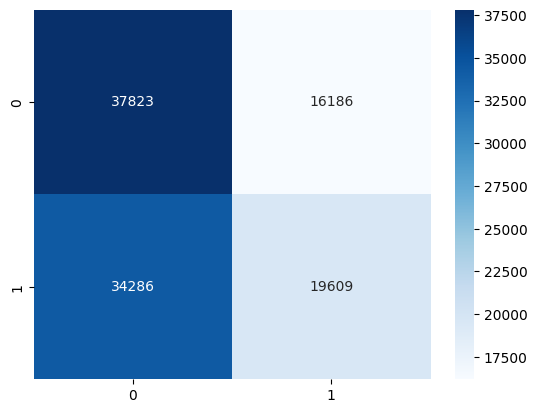

In [21]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)

In [33]:
with open('/content/drive/MyDrive/New Data/Pickle_Models/Final_logistic_model.pkl', 'wb') as file:  # 'wb' for write-binary mode
    pickle.dump(lg, file)

In [34]:
import numpy as np
# def predict_Fraud(X,gender,spec,state,tot_hcpcs,avg_age,tot_serv,tot_bene,avg_risk_score,charges_subm,charges_payed):
#         with open('/content/drive/MyDrive/New Data/Pickle_Models/Loge_Model.pkl' ,'rb') as file:
#             model = pickle.load(file)

#         gender_index = np.where(X.columns==gender)[0]
#         speciality_index = np.where(X.columns==spec)[0]
#         state_index = np.where(X.columns==state)[0]

#         x= np.zeros(len(X.columns))
#         x[0]= tot_hcpcs
#         x[1]=avg_age
#         x[2]=tot_serv
#         x[3]=tot_bene
#         x[4]=avg_risk_score
#         x[5]=charges_subm
#         x[6]=charges_payed
#         if gender_index > 0:
#               x[gender_index[0]]=1
#         if speciality_index > 0:
#               x[speciality_index[0]]=1
#         if state_index > 0:
#               x[state_index[0]]=1
#         pred = model.predict([x])[0]
#         label = 'Potential Fraud' if pred==1 else 'Legitimate'

#         return label
def predict_Fraud(X, gender, spec, state, tot_hcpcs, avg_age, tot_serv, tot_bene, avg_risk_score, charges_subm, charges_payed):
    with open('/content/drive/MyDrive/New Data/Pickle_Models/Final_logistic_model.pkl' ,'rb') as file:
            model = pickle.load(file)

    gender_index = np.where(X.columns == gender)[0]
    speciality_index = np.where(X.columns == spec)[0]
    state_index = np.where(X.columns == state)[0]

    x = np.zeros(len(X.columns))
    x[0] = tot_hcpcs
    x[1] = avg_age
    x[2] = tot_serv
    x[3] = tot_bene
    x[4] = avg_risk_score
    x[5] = charges_subm
    x[6] = charges_payed

    if gender_index.size > 0:  # Check if the array is not empty
        x[gender_index[0]] = 1  # Use the first index if it exists
    if speciality_index.size > 0:  # Check if the array is not empty
        x[speciality_index[0]] = 1  # Use the first index if it exists
    if state_index.size > 0:  # Check if the array is not empty
        x[state_index[0]] = 1  # Use the first index if it exists

    pred = lg.predict([x])[0]
    label = 'Potential Fraud' if pred == 1 else 'Legitimate'

    return label

In [50]:
X_train.head().to_csv("/content/drive/MyDrive/New Data/Pickle_Models/Final_Logistic_Columns.csv",index=False)

In [53]:
X = pd.read_csv("/content/drive/MyDrive/New Data/Pickle_Models/Final_Logistic_Columns.csv", nrows=0)

In [54]:
print(predict_Fraud(X, "M" ,"Family Practice",	"MI	" ,44	,72	,2346	,347	,1.25 ,	5.85858,	1.270714))


Potential Fraud


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [37]:
pred =  lg.predict(X_res)
act = pd.DataFrame({"Actual": list(y_smt) , "Predicition": list(pred) })
df1 = pd.concat([X_smt,act],axis=1)

In [38]:
df1[(df1["Predicition"]==1) & (df1["Actual"]==1) ]


,Rndrng_Prvdr_Type,Rndrng_Prvdr_State_Abrvtn,Provider_Gender_Or_Organization,Tot_HCPCS_Cds,Bene_Avg_Age,Tot_Srvcs,Tot_Benes,Bene_Avg_Risk_Scre,Tot_Sbmtd_Chrg,Tot_Mdcr_Pymt_Amt,Actual,Predicition
179840,Internal Medicine,CA,M,44,72,2346.000000,347,1.252700,5.858584e+05,1.270714e+05,1,1
179841,General Surgery,FL,M,51,72,339.000000,196,1.729900,1.979040e+05,8.528946e+04,1,1
179843,Urology,WA,M,39,74,785.000000,111,1.425600,6.008460e+04,1.978258e+04,1,1
179844,Internal Medicine,GA,M,48,76,4428.000000,630,1.186300,6.650480e+05,1.419183e+05,1,1
179845,Family Practice,MI,M,65,72,1874.000000,191,1.020300,1.141510e+05,6.138664e+04,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
359670,Internal Medicine,NC,M,78,72,3681.720686,435,1.092659,4.155434e+05,1.319672e+05,1,1
359672,Internal Medicine,MS,M,38,72,1824.431424,573,1.868071,2.877178e+05,1.197076e+05,1,1
359677,Hematology-Oncology,CA,M,72,74,66441.303584,1058,1.650373,3.895602e+06,1.672728e+06,1,1
359678,Certified Registered Nurse Anesthetist (CRNA),FL,M,47,72,128.563314,94,1.428159,2.813775e+05,1.852101e+04,1,1


In [60]:
print(predict_Fraud(X_res, "M", "Plastic and Reconstructive Surgery" ,	"MI",	51	,73	,533.0,	71	,1.6177	,250569.00	,67712.67		))


Potential Fraud


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Random forest Final model


In [56]:
from datetime import datetime
import time
rf = RandomForestClassifier(random_state=23, max_features=150)
t1 = time.time()
rf.fit(X_train, y_train)
y_pred_rf = lg.predict(X_test)
lg.score(X_test,y_test)
t2 = time.time()

In [59]:
lg.score(X_test,y_test)

0.5322508896797153

<Axes: >

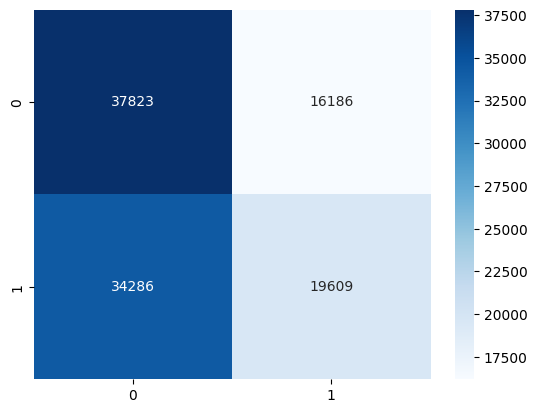

In [57]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)

In [58]:
with open('/content/drive/MyDrive/New Data/Pickle_Models/Final_rf_model.pkl', 'wb') as file:  # 'wb' for write-binary mode
    pickle.dump(lg, file)

In [62]:
def predict_Fraud_rf(X, gender, spec, state, tot_hcpcs, avg_age, tot_serv, tot_bene, avg_risk_score, charges_subm, charges_payed):
    with open('/content/drive/MyDrive/New Data/Pickle_Models/Final_logistic_model.pkl' ,'rb') as file:
            model = pickle.load(file)

    gender_index = np.where(X.columns == gender)[0]
    speciality_index = np.where(X.columns == spec)[0]
    state_index = np.where(X.columns == state)[0]

    x = np.zeros(len(X.columns))
    x[0] = tot_hcpcs
    x[1] = avg_age
    x[2] = tot_serv
    x[3] = tot_bene
    x[4] = avg_risk_score
    x[5] = charges_subm
    x[6] = charges_payed

    if gender_index.size > 0:  # Check if the array is not empty
        x[gender_index[0]] = 1  # Use the first index if it exists
    if speciality_index.size > 0:  # Check if the array is not empty
        x[speciality_index[0]] = 1  # Use the first index if it exists
    if state_index.size > 0:  # Check if the array is not empty
        x[state_index[0]] = 1  # Use the first index if it exists

    pred = lg.predict([x])[0]
    label = 'Potential Fraud' if pred == 1 else 'Legitimate'

    return label

In [63]:
X = pd.read_csv("/content/drive/MyDrive/New Data/Pickle_Models/Final_Logistic_Columns.csv", nrows=0)

In [64]:
print(predict_Fraud_rf(X, "M" ,"Family Practice",	"MI	" ,44	,72	,2346	,347	,1.25 ,	5.85858,	1.270714))


Potential Fraud


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [65]:
print(predict_Fraud_rf(X_res, "M", "Plastic and Reconstructive Surgery" ,	"MI",	51	,73	,533.0,	71	,1.6177	,250569.00	,67712.67		))


Potential Fraud


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
pred =  rf.predict(X_res)
act = pd.DataFrame({"Actual": list(y_smt) , "Predicition": list(pred) })
df1 = pd.concat([X_smt,act],axis=1)
df1[(df1["Predicition"]==1) & (df1["Actual"]==1) ]